In [1]:
from google.colab import files
uploaded = files.upload()

Saving my_movies.csv to my_movies.csv


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules


In [38]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-3-0269635a80f9>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [5]:
df = pd.read_csv('my_movies.csv')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [6]:
data = df.iloc[:,5:]
data


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [7]:
# most popular items
count = data.loc[:,:].sum()
count


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [8]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10, 10)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print()


Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64

Gladiator
1    7
0    3
Name: Gladiator, dtype: int64

LOTR1
0    8
1    2
Name: LOTR1, dtype: int64

Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64

Patriot
1    6
0    4
Name: Patriot, dtype: int64

LOTR2
0    8
1    2
Name: LOTR2, dtype: int64

Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64

LOTR
0    9
1    1
Name: LOTR, dtype: int64

Braveheart
0    9
1    1
Name: Braveheart, dtype: int64

Green Mile
0    8
1    2
Name: Green Mile, dtype: int64



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
print('The unique books sold are {}'.format(data.columns))
print("The number of unique books sold are {} ".format(data.columns.size))


The unique books sold are Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')
The number of unique books sold are 10 


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


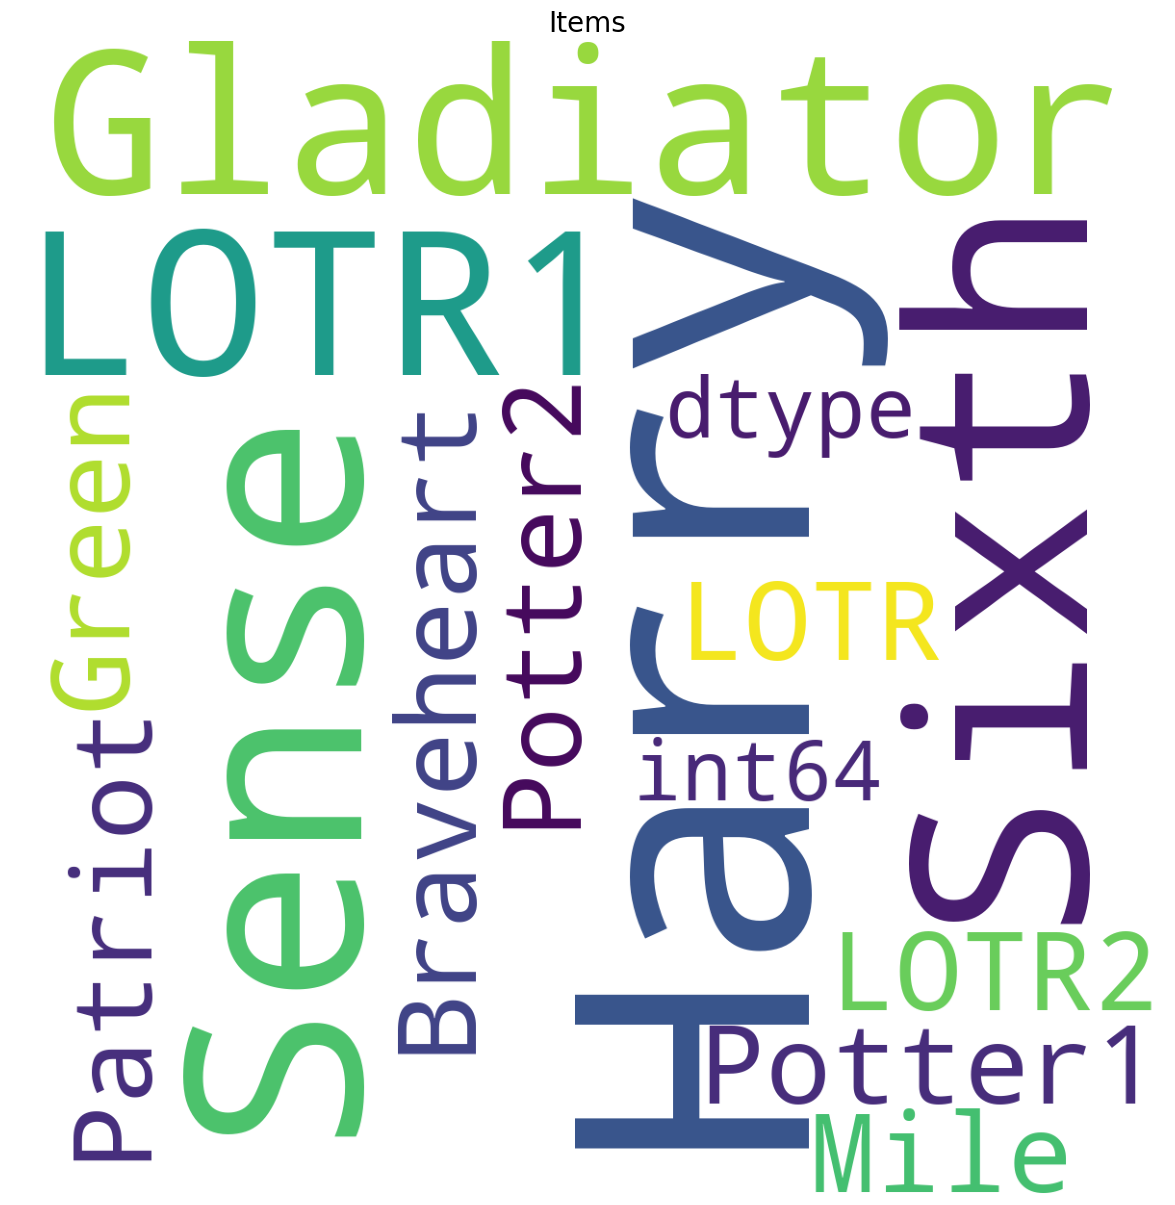

In [13]:
#DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data.sum()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


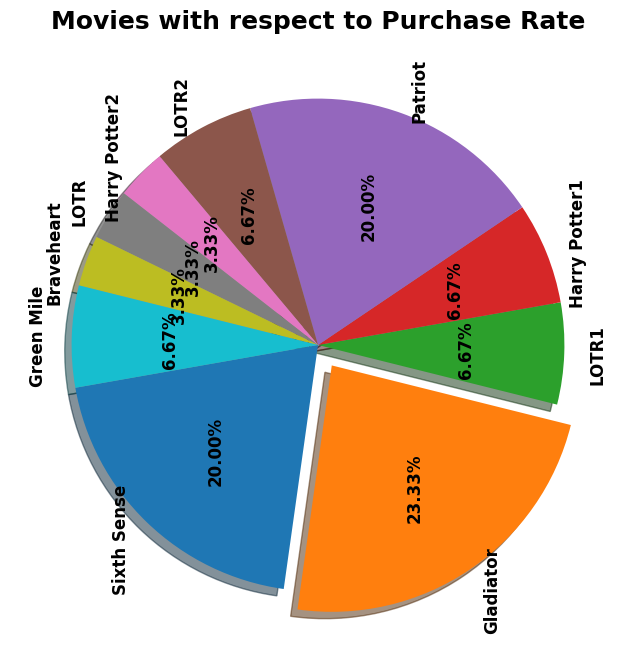

In [15]:
plt.figure(figsize = (12,8))
plt.pie(data.sum(),
       labels=data.columns,
       explode = [0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'vertical',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Movies with respect to Purchase Rate", fontsize = 18, fontweight = 'bold')
plt.show()


In [16]:
# Top 10 Popular items
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-571aa924c0ca>:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  count.sort_values(0, ascending = False, inplace=True)


,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


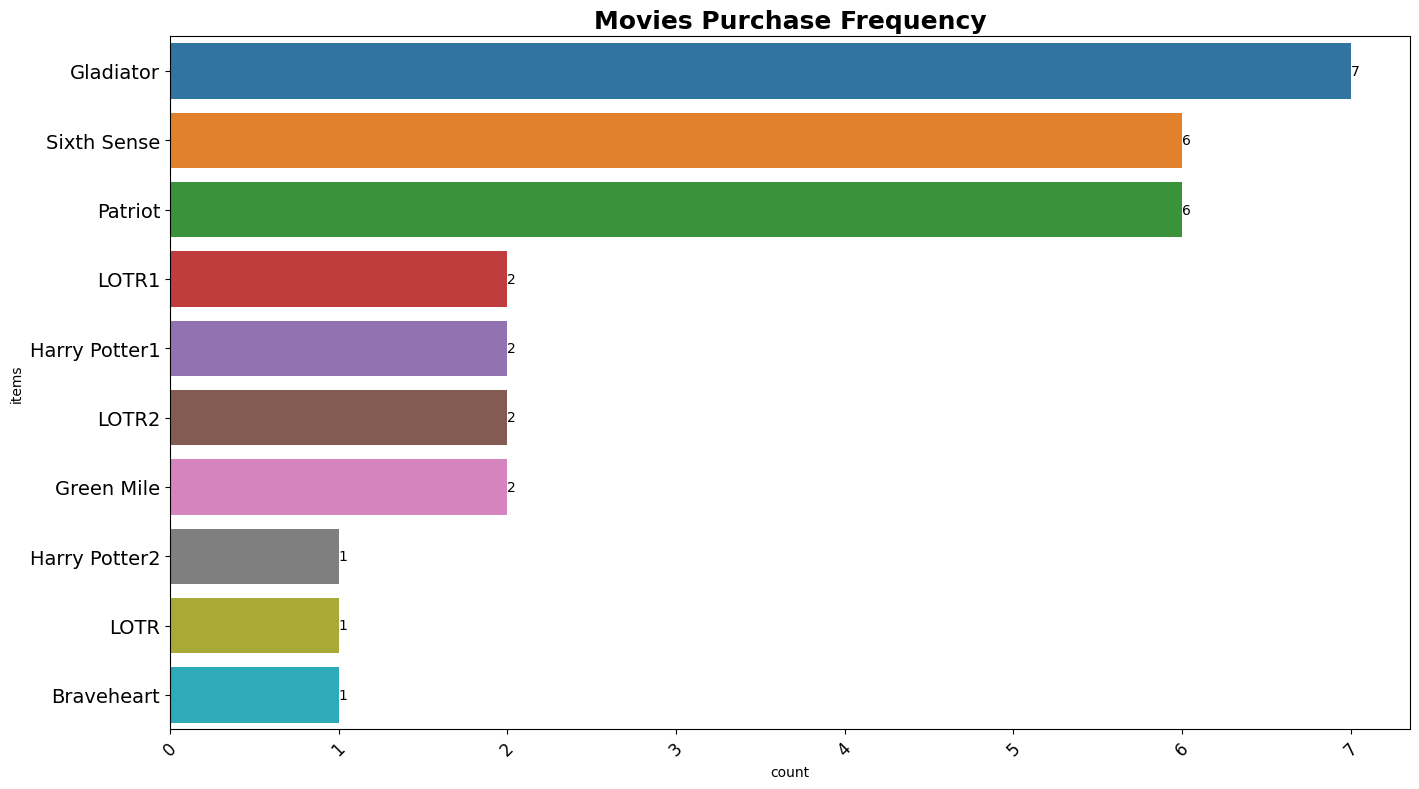

In [17]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = 'count', y = 'items', data= count)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Movies Purchase Frequency',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)


In [18]:
#Support and Length
# Product Frequency / Total Sales
first = pd.DataFrame(data.sum() / data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [19]:
# Elimination by Support Value
first[first.Support >= 0.1]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [20]:
# Elimination by Support Value
first[first.Support >= 0.15]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


In [21]:
# Elimination by Support Value
first[first.Support >= 0.20]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


In [22]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Gladiator', 'Sixth Sense'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'LOTR1'],
 ['Gladiator', 'Harry Potter1'],
 ['Gladiator', 'LOTR2'],
 ['Gladiator', 'Green Mile'],
 ['Gladiator', 'Harry Potter2'],
 ['Gladiator', 'LOTR'],
 ['Gladiator', 'Braveheart'],
 ['Sixth Sense', 'Patriot']]

In [23]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support,length
index,,
"(Gladiator, Patriot)",0.6,2
"(Gladiator, Sixth Sense)",0.5,2
"(Sixth Sense, Patriot)",0.4,2
"(Sixth Sense, Green Mile)",0.2,2
"(LOTR1, LOTR2)",0.2,2


In [24]:
second = list(itertools.combinations(first.index, 3))
second = [list(i) for i in second]
# Sample of combinations
second[:10]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Gladiator', 'Sixth Sense', 'Patriot'],
 ['Gladiator', 'Sixth Sense', 'LOTR1'],
 ['Gladiator', 'Sixth Sense', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'Green Mile'],
 ['Gladiator', 'Sixth Sense', 'Harry Potter2'],
 ['Gladiator', 'Sixth Sense', 'LOTR'],
 ['Gladiator', 'Sixth Sense', 'Braveheart'],
 ['Gladiator', 'Patriot', 'LOTR1'],
 ['Gladiator', 'Patriot', 'Harry Potter1']]

In [25]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support,length
index,,
"(Gladiator, Sixth Sense, Patriot)",0.4,3


In [26]:
second = list(itertools.combinations(first.index, 4))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR1'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Green Mile'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Harry Potter2'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Braveheart'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'Green Mile']]

In [27]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum()
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support,length
index,,


In [28]:
#Association rules
# With 10% Support
frequent_itemsets=apriori(data,min_support=0.1,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [29]:
# with 30% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.3)
rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
212,"(LOTR1, LOTR2)","(Sixth Sense, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
213,(Green Mile),"(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(Harry Potter1),"(Sixth Sense, LOTR1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [30]:
rules.sort_values('lift',ascending=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
165,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
170,"(LOTR2, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
183,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
182,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
85,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
6,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
14,(Green Mile),(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6,-0.333333


In [31]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
212,"(LOTR1, LOTR2)","(Sixth Sense, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
213,(Green Mile),"(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(Harry Potter1),"(Sixth Sense, LOTR1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(LOTR1),"(Sixth Sense, Harry Potter1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


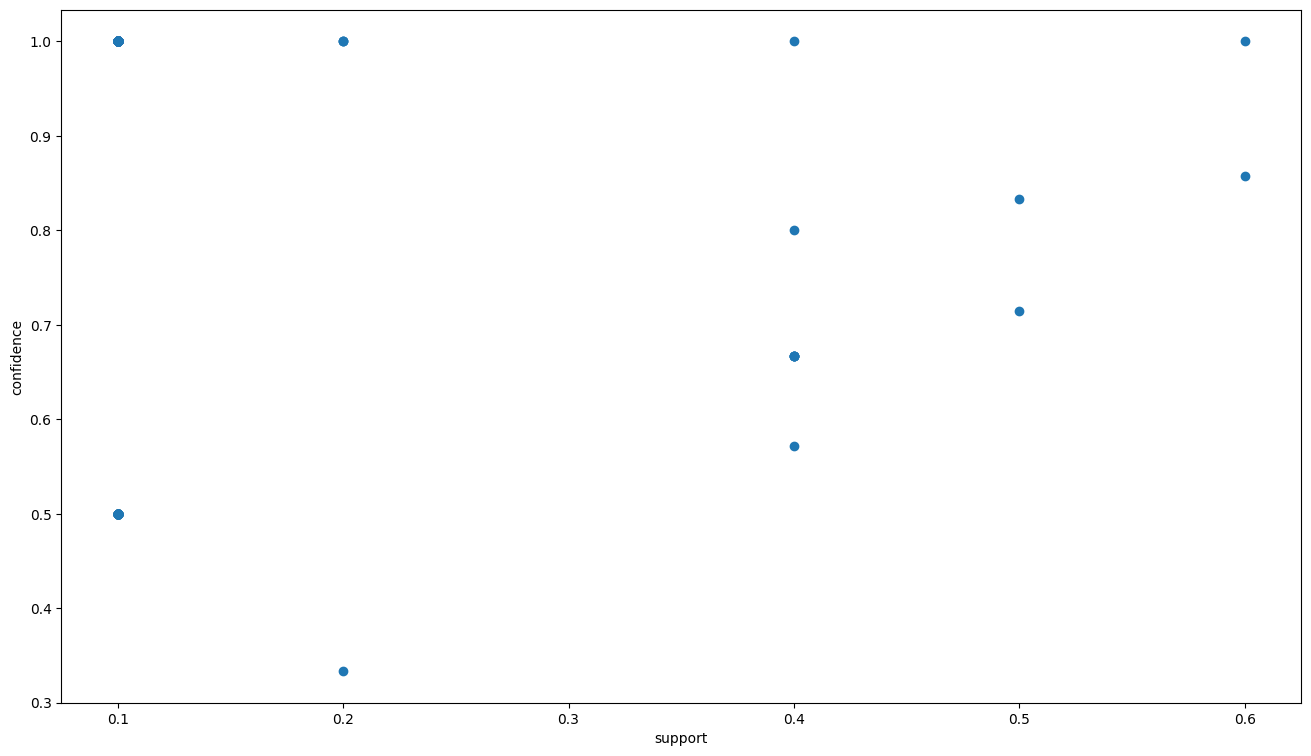

In [32]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()


In [33]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-33-1d6809d46d9e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = lift.pivot('antecedents','consequents','lift')


consequents,(Gladiator),"(LOTR1, Green Mile)","(Harry Potter1, Green Mile)","(LOTR2, Green Mile)","(Sixth Sense, Gladiator, Green Mile)",(Harry Potter1),"(Sixth Sense, Gladiator, LOTR)","(Sixth Sense, LOTR1, LOTR2)","(Sixth Sense, LOTR1, Harry Potter1)","(Sixth Sense, Harry Potter1, Green Mile)","(Sixth Sense, LOTR1, Green Mile)",(LOTR2),"(Sixth Sense, LOTR2, Green Mile)","(LOTR1, LOTR2, Green Mile)","(Harry Potter1, LOTR1, Green Mile)","(Sixth Sense, LOTR1, LOTR2, Green Mile)","(Harry Potter1, LOTR1)","(LOTR1, LOTR2)","(Harry Potter1, LOTR2)","(Gladiator, Green Mile)",(Sixth Sense),"(Harry Potter1, LOTR1, LOTR2)","(Sixth Sense, LOTR1, Harry Potter1, LOTR2)",(Patriot),(Green Mile),"(Harry Potter1, LOTR2, Green Mile)",(LOTR1),(Harry Potter2),(LOTR),"(Gladiator, Patriot)","(Sixth Sense, Patriot)","(Sixth Sense, Harry Potter1, LOTR2)","(Sixth Sense, Gladiator)","(Sixth Sense, Harry Potter1)","(Sixth Sense, LOTR1)","(Sixth Sense, LOTR2)","(Sixth Sense, Green Mile)","(Sixth Sense, LOTR)","(Sixth Sense, Harry Potter1, LOTR2, Green Mile)","(Gladiator, LOTR)","(Sixth Sense, LOTR1, Harry Potter1, Green Mile)"
antecedents,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(Sixth Sense),1.190476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111,1.666667,NaN,NaN,NaN,NaN,1.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR2, Green Mile)",NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR, Green Mile)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Gladiator)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR1, LOTR2)",NaN,NaN,5.0,NaN,NaN,2.5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN
(Harry Potter1),NaN,5.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0,2.5,5.0,5.0,NaN,5.0,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,2.5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,2.5,NaN,NaN,NaN,NaN
"(Sixth Sense, Gladiator, LOTR)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Gladiator, Green Mile)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5]),
 [Text(0.5, 0, "frozenset({'Gladiator'})"),
  Text(1.5, 0, "frozenset({'LOTR1', 'Green Mile'})"),
  Text(2.5, 0, "frozenset({'Harry Potter1', 'Green Mile'})"),
  Text(3.5, 0, "frozenset({'LOTR2', 'Green Mile'})"),
  Text(4.5, 0, "frozenset({'Sixth Sense', 'Gladiator', 'Green Mile'})"),
  Text(5.5, 0, "frozenset({'Harry Potter1'})"),
  Text(6.5, 0, "frozenset({'Sixth Sense', 'Gladiator', 'LOTR'})"),
  Text(7.5, 0, "frozenset({'Sixth Sense', 'LOTR1', 'LOTR2'})"),
  Text(8.5, 0, "frozenset({'Sixth Sense', 'LOTR1', 'Harry Potter1'})"),
  Text(9.5, 0, "frozenset({'Sixth Sense', 'Harry Potter1', 'Green Mile'})"),
  Text(10.5, 0, "frozenset({'Sixth Sense', 'LOTR1', 'Green Mile'})"),
  Text(11.5, 0, "frozenset({'LOTR2'

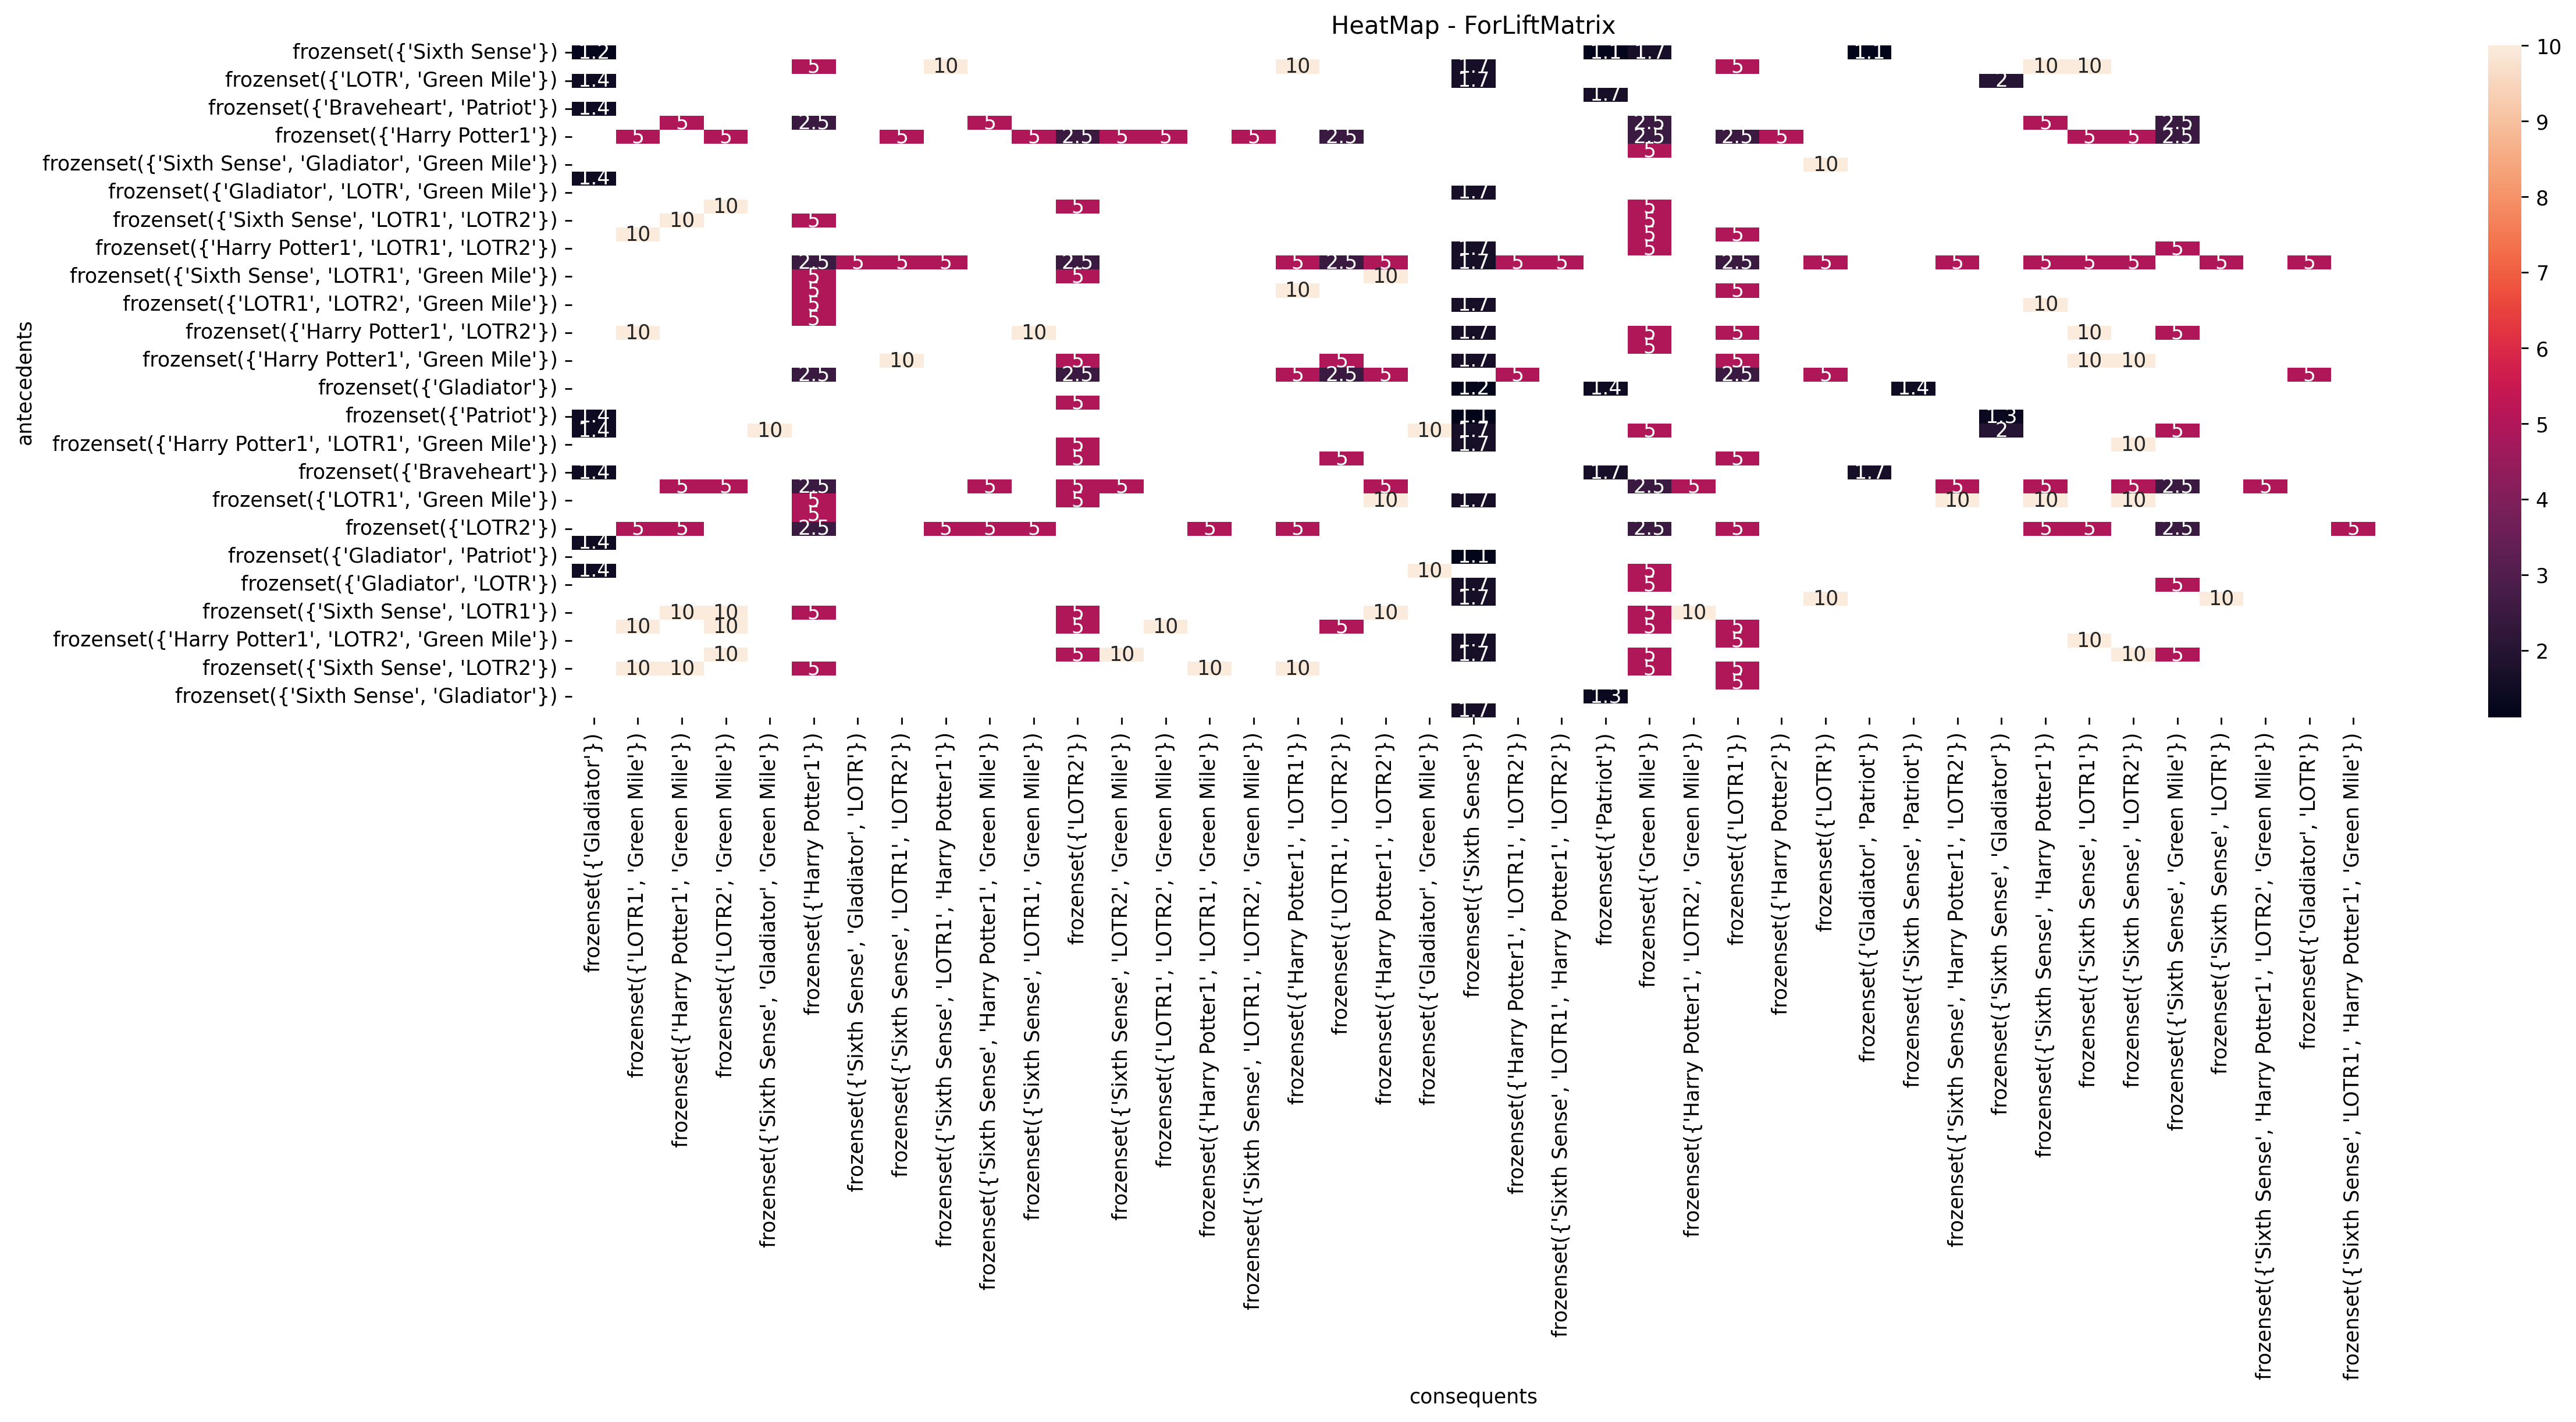

In [34]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'lift vs Confidence')

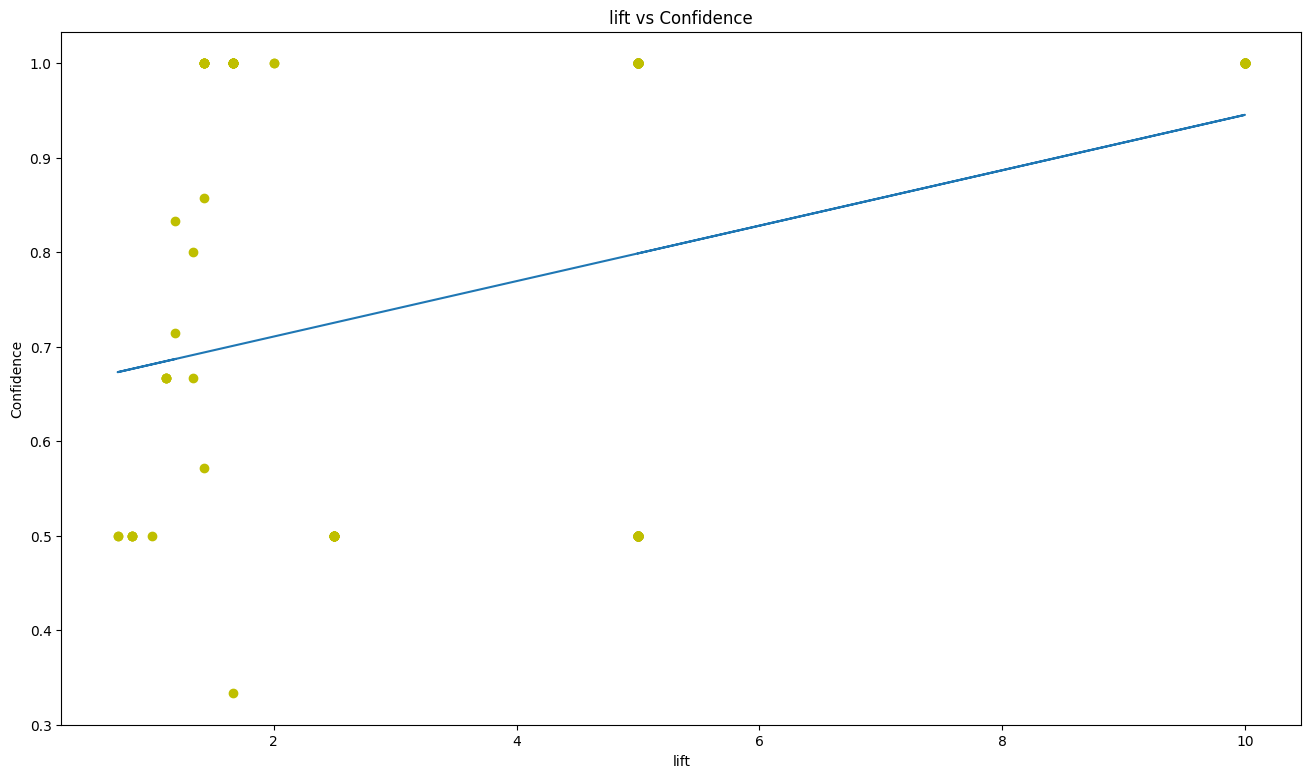

In [40]:
plt.figure(figsize=(16,9))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')


In [41]:
# With 15% Support
frequent_itemsets=apriori(data,min_support=0.15,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


In [42]:
# with 40% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.4)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000


In [43]:
rules.sort_values('lift',ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
10,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
13,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
14,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000


In [44]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000


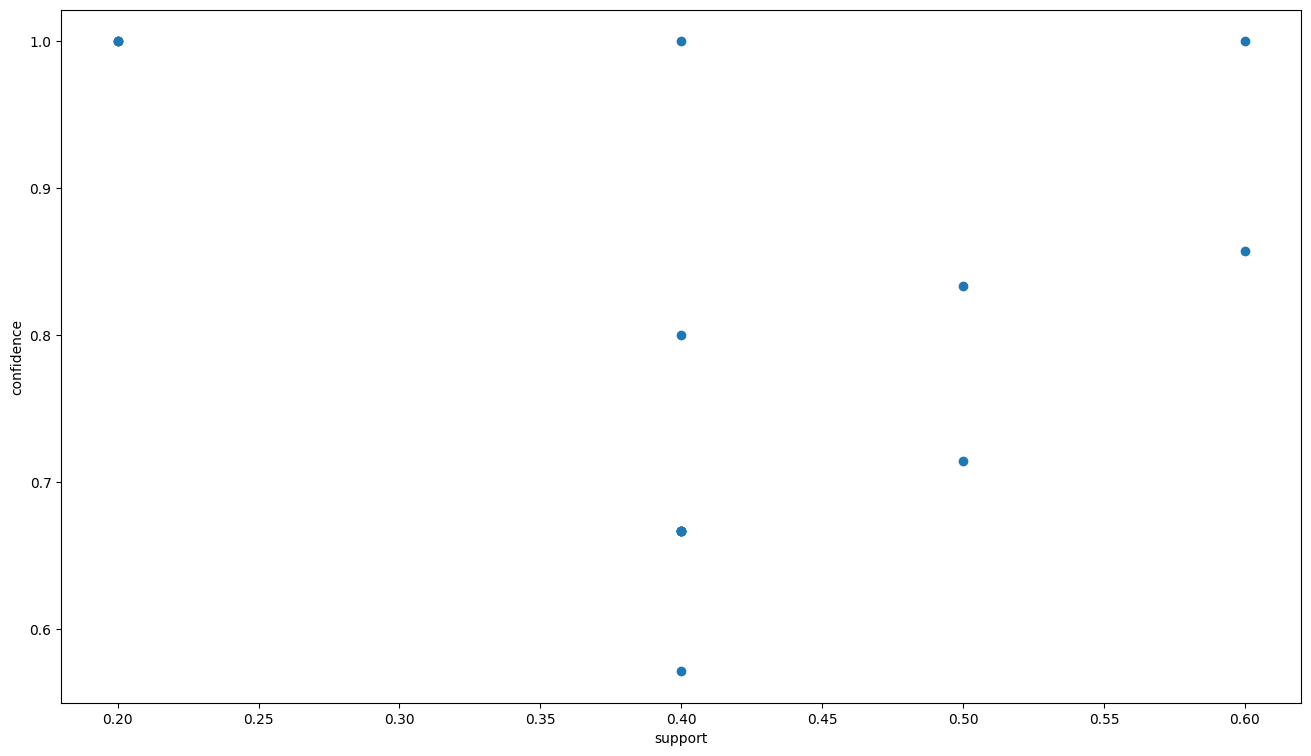

In [45]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [46]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix


consequents,(Gladiator),(Sixth Sense),(Patriot),(LOTR2),(LOTR1),"(Gladiator, Patriot)","(Sixth Sense, Patriot)","(Sixth Sense, Gladiator)"
antecedents,,,,,,,,
(Sixth Sense),1.190476,NaN,1.111111,NaN,NaN,1.111111,NaN,NaN
(Gladiator),NaN,1.190476,1.428571,NaN,NaN,NaN,1.428571,NaN
(Patriot),1.428571,1.111111,NaN,NaN,NaN,NaN,NaN,1.333333
(Green Mile),NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
"(Sixth Sense, Gladiator)",NaN,NaN,1.333333,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Patriot)",NaN,1.111111,NaN,NaN,NaN,NaN,NaN,NaN


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, "frozenset({'Gladiator'})"),
  Text(1.5, 0, "frozenset({'Sixth Sense'})"),
  Text(2.5, 0, "frozenset({'Patriot'})"),
  Text(3.5, 0, "frozenset({'LOTR2'})"),
  Text(4.5, 0, "frozenset({'LOTR1'})"),
  Text(5.5, 0, "frozenset({'Gladiator', 'Patriot'})"),
  Text(6.5, 0, "frozenset({'Sixth Sense', 'Patriot'})"),
  Text(7.5, 0, "frozenset({'Sixth Sense', 'Gladiator'})")])

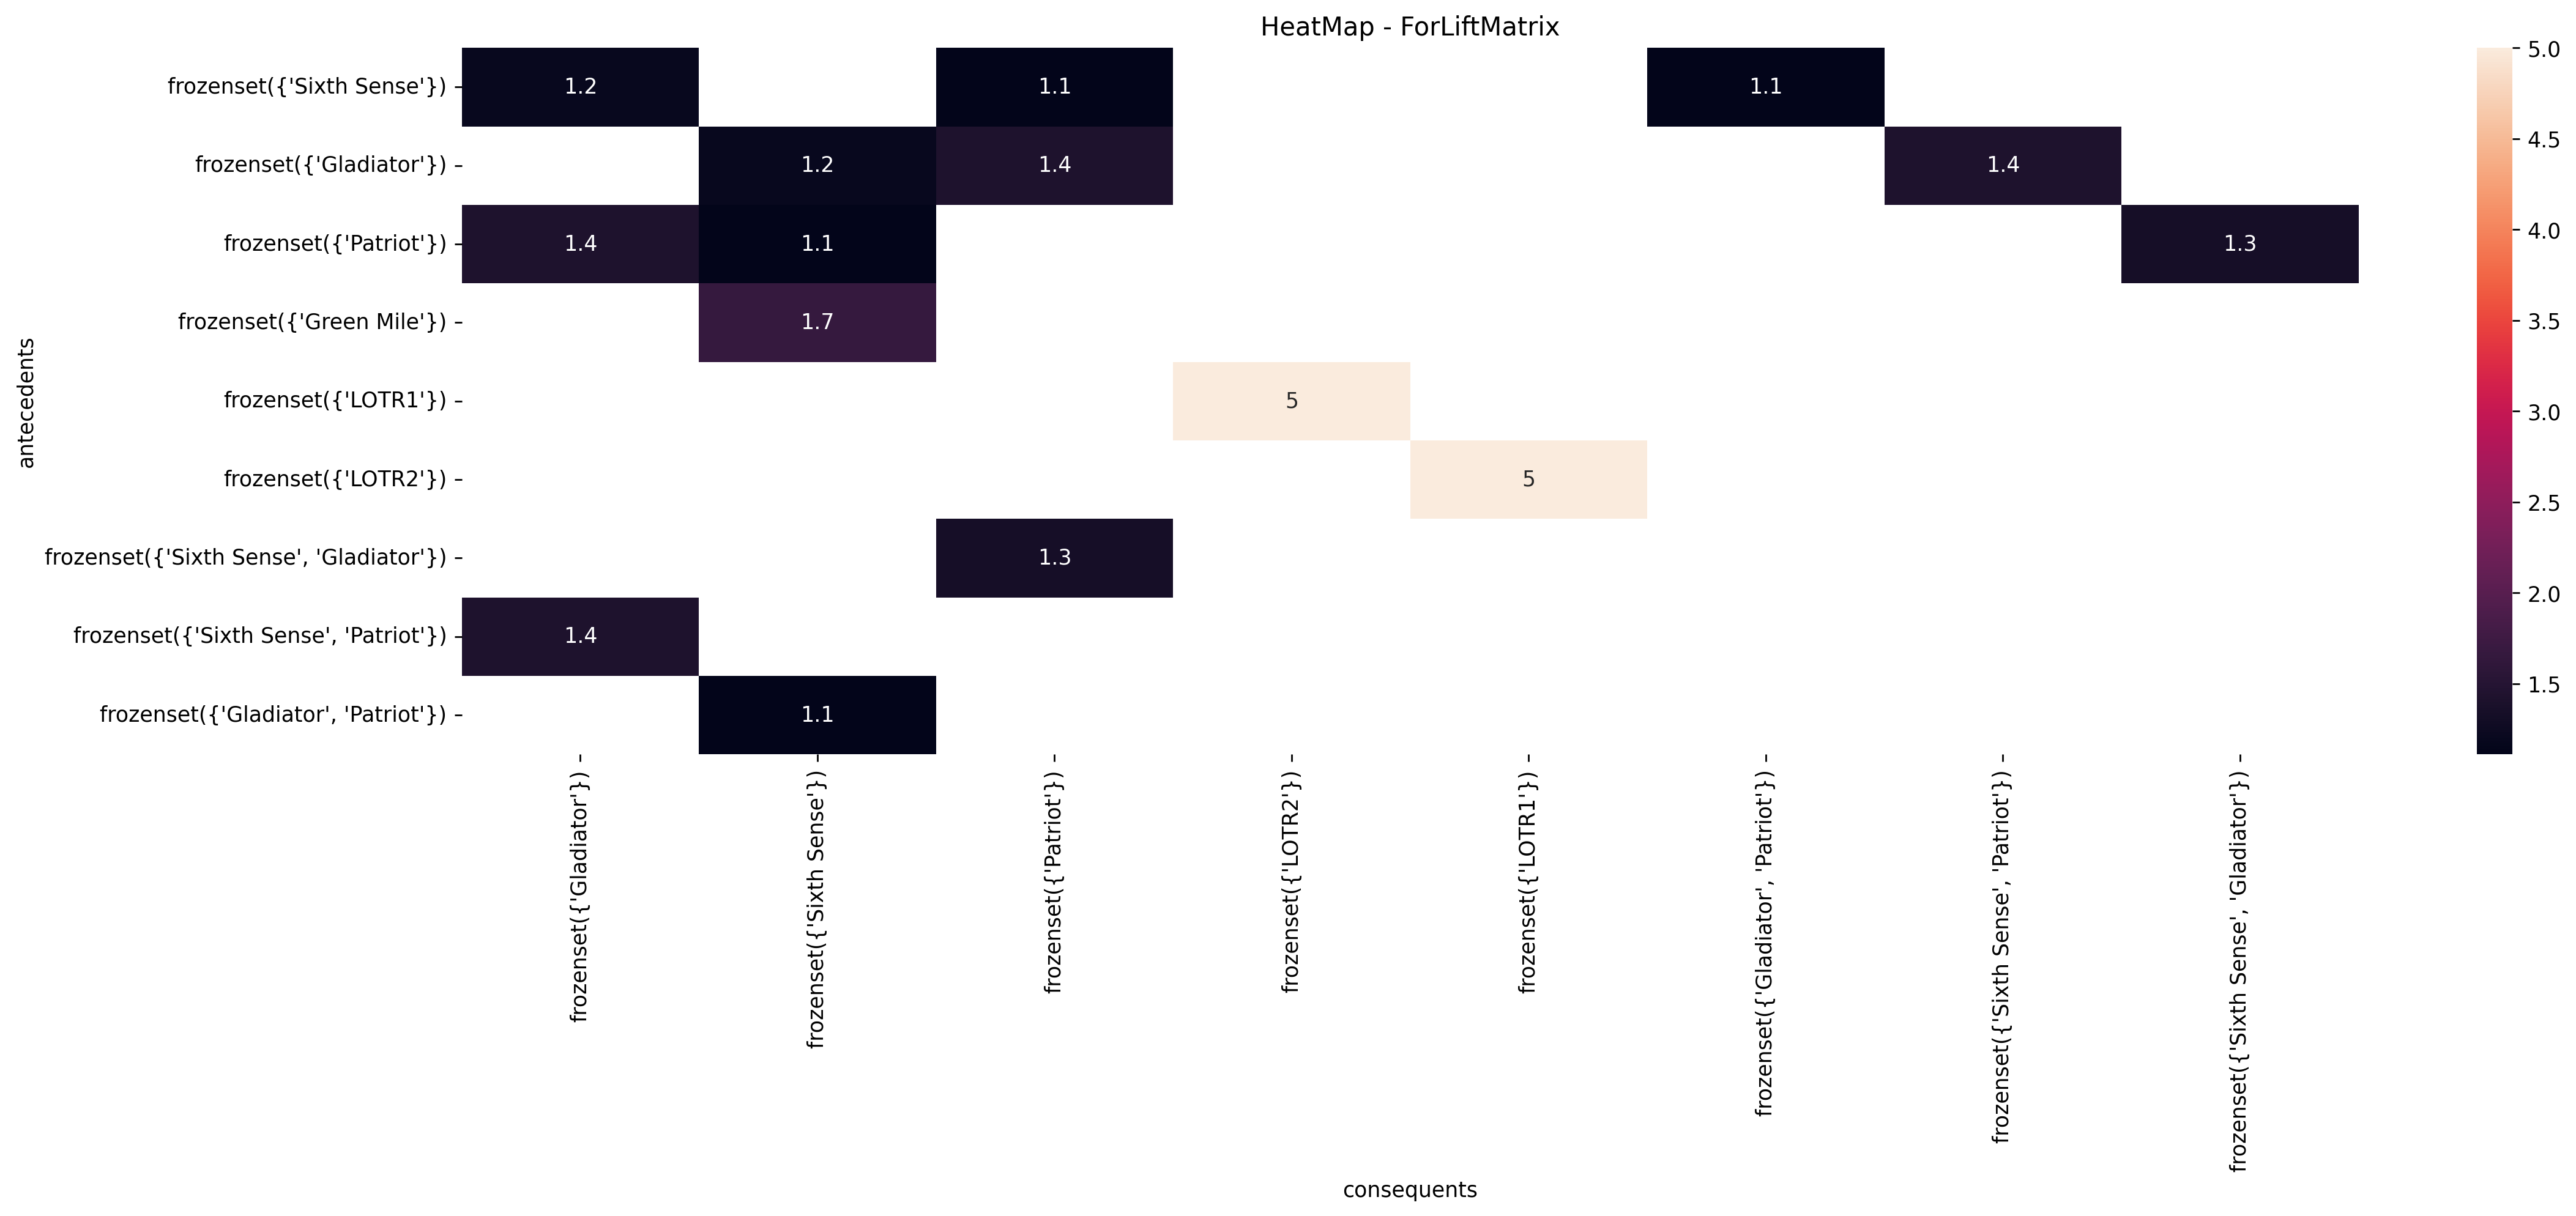

In [47]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'lift vs Confidence')

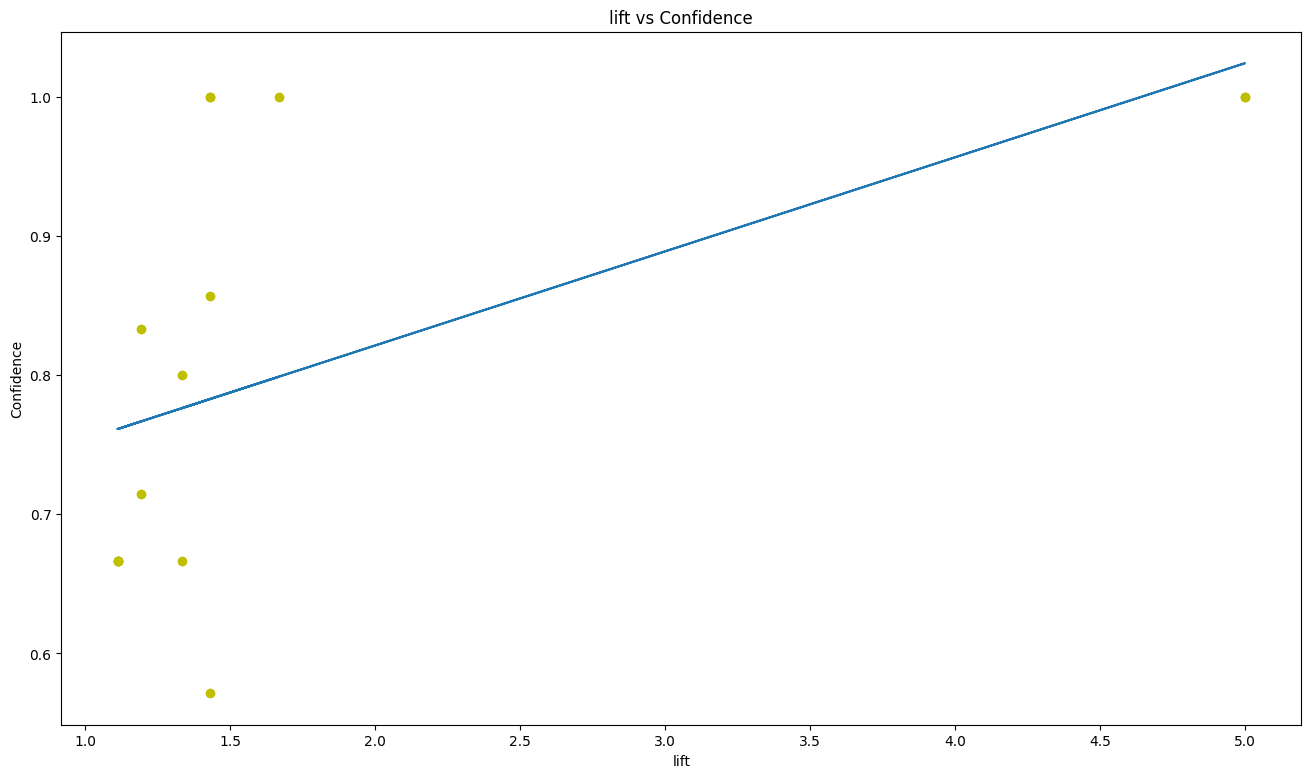

In [52]:
plt.figure(figsize=(16,9))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')


In [53]:
# With 20% Support
frequent_itemsets=apriori(data,min_support=0.2,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


In [54]:
# with 60% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.6)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000


In [55]:
rules.sort_values('lift',ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
10,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
13,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333


In [56]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000


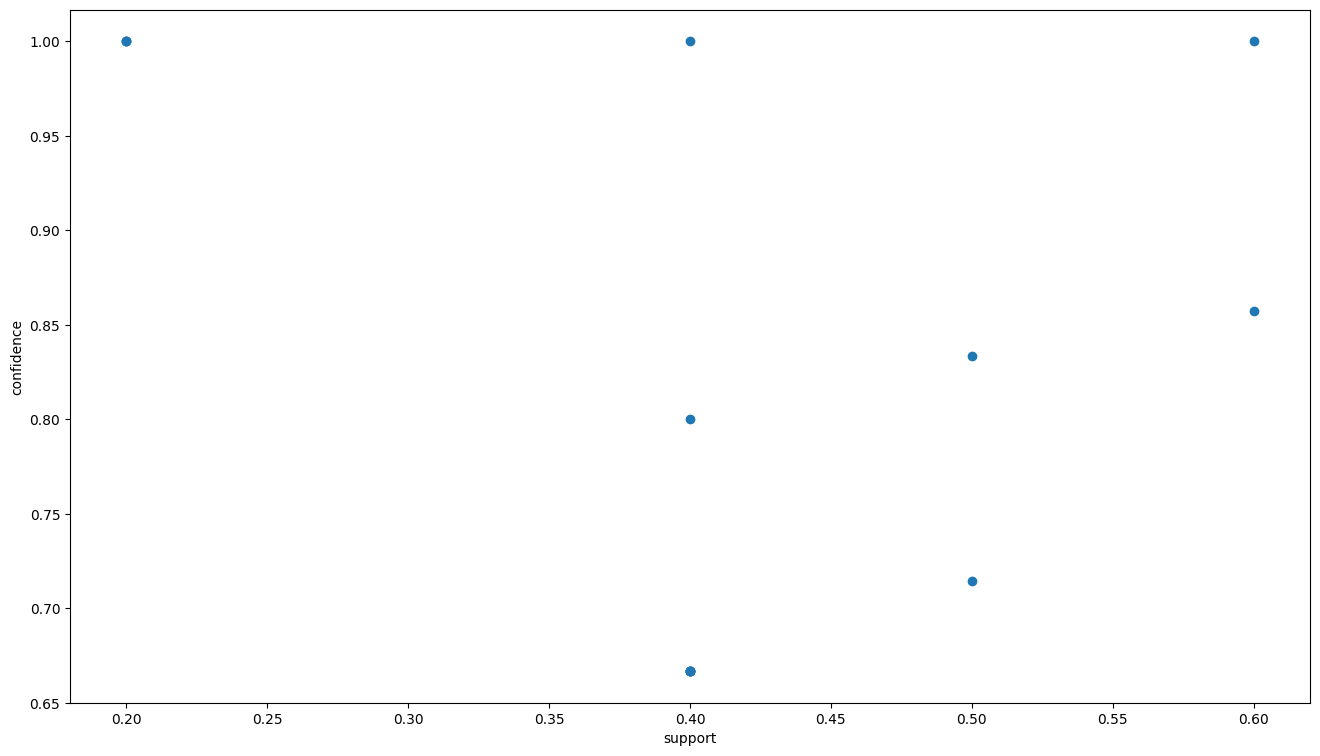

In [57]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()


In [58]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix


consequents,(Gladiator),(Sixth Sense),(Patriot),(LOTR2),(LOTR1),"(Gladiator, Patriot)","(Sixth Sense, Gladiator)"
antecedents,,,,,,,
(Sixth Sense),1.190476,NaN,1.111111,NaN,NaN,1.111111,NaN
(Gladiator),NaN,1.190476,1.428571,NaN,NaN,NaN,NaN
(Patriot),1.428571,1.111111,NaN,NaN,NaN,NaN,1.333333
(Green Mile),NaN,1.666667,NaN,NaN,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,5.0,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,NaN,5.0,NaN,NaN
"(Sixth Sense, Gladiator)",NaN,NaN,1.333333,NaN,NaN,NaN,NaN
"(Sixth Sense, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Patriot)",NaN,1.111111,NaN,NaN,NaN,NaN,NaN


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, "frozenset({'Gladiator'})"),
  Text(1.5, 0, "frozenset({'Sixth Sense'})"),
  Text(2.5, 0, "frozenset({'Patriot'})"),
  Text(3.5, 0, "frozenset({'LOTR2'})"),
  Text(4.5, 0, "frozenset({'LOTR1'})"),
  Text(5.5, 0, "frozenset({'Gladiator', 'Patriot'})"),
  Text(6.5, 0, "frozenset({'Sixth Sense', 'Gladiator'})")])

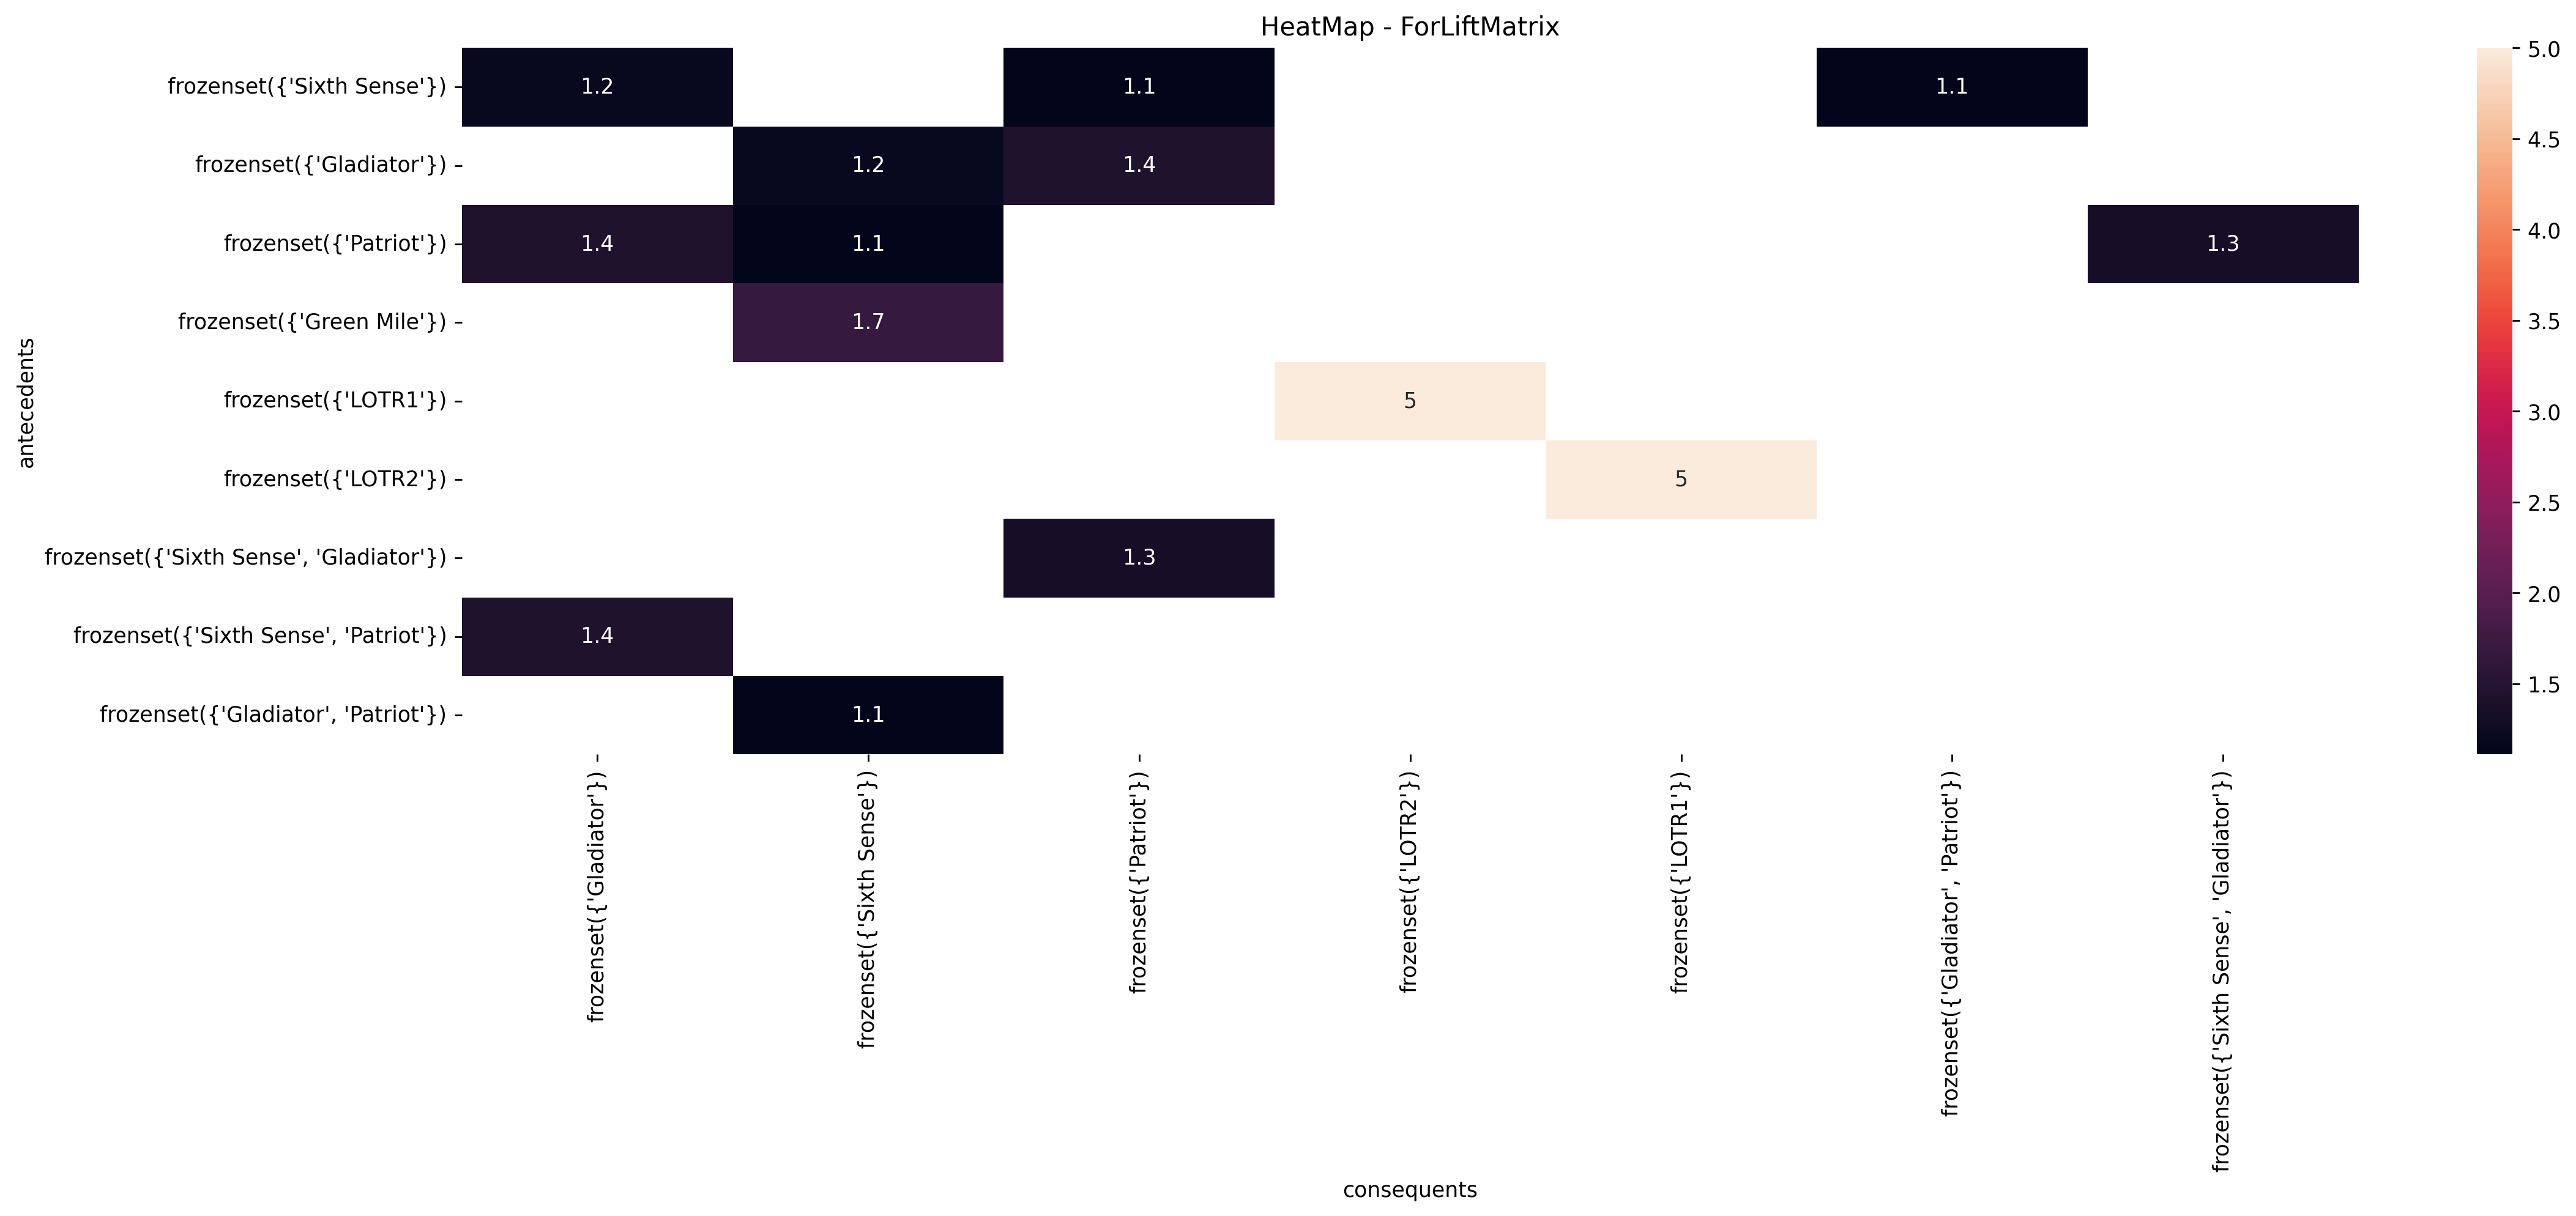

In [62]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
